### Treść zadania

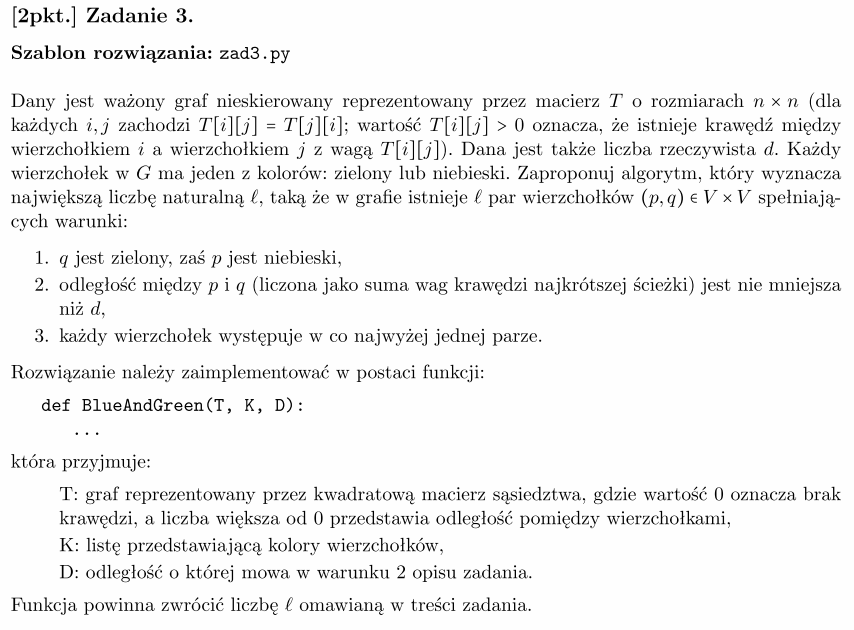
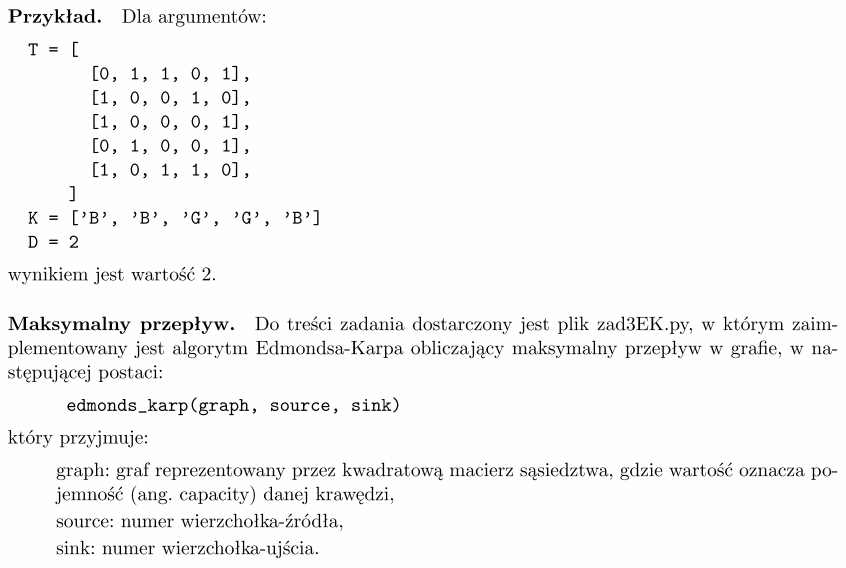

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
#------------------------------------
G1 = [
      [0, 1, 1, 0, 1],
      [1, 0, 0, 1, 0],
      [1, 0, 0, 0, 1],
      [0, 1, 0, 0, 1],
      [1, 0, 1, 1, 0],
     ]
K1 = ['B', 'B', 'G', 'G', 'B']
D1 = 2
R1 = 2
T1 = [G1, K1, D1, R1]
#------------------------------------
G2 = [
      [0, 1, 1, 1],
      [1, 0, 1, 1],
      [1, 1, 0, 1],
      [1, 1, 1, 0],
     ]
K2 = ['B', 'G', 'G', 'B']
D2 = 1
R2 = 2
T2 = [G2, K2, D2, R2]
#------------------------------------
G3 = [
      [0, 1, 1, 1],
      [1, 0, 1, 1],
      [1, 1, 0, 1],
      [1, 1, 1, 0],
     ]
K3 = ['B', 'G', 'G', 'B']
D3 = 2
R3 = 0
T3 = [G3, K3, D3, R3]
#------------------------------------
G4 = [
      [0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0, 0],
      [1, 1, 1, 0, 1, 0, 0, 0],
      [0, 0, 0, 1, 0, 1, 1, 1],
      [0, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 1, 0, 0, 0],
     ]
K4 = ['G', 'B', 'G', 'G', 'G', 'G', 'B', 'G']
D4 = 3
R4 = 2
T4 = [G4, K4, D4, R4]
#------------------------------------

TESTS = [ T1, T2, T3, T4 ]

def runtests(f):
    OK = True
    for T in TESTS:
        print("-----------------------------------------")
        print("Dane:")
        res = f(T[0], T[1], T[2])
        print("Oczekiwany rezultat: {}, Wynik: {}".format(T[3], res))

        if res != T[3]:
            print("Blad!")
            OK = False
        else:
            print("OK")
    print("-----------------------------------------")

    if OK:
        print("OK!")
    else:
        print("Bledy!")

### Edmonds-Karp

##### Implementacja algorytmu dostarczona w plikach z zadaniami

In [2]:
import collections


def bfs(graph, s, t, parent):
    visited = [False] * len(graph)
    queue = collections.deque()
    queue.append(s)
    visited[s] = True
    while queue:
        u = queue.popleft()
        for ind, val in enumerate(graph[u]):
            if (visited[ind] == False) and (val > 0):
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u
    return visited[t]


def edmonds_karp(graph, source, sink):
    parent = [-1] * len(graph)
    max_flow = 0
    while bfs(graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink
        while s != source:
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]
        max_flow += path_flow
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]
    return max_flow

### Omówienie algorytmu

W pierwszej kolejności, aby spełniony był warunek, że każda najkrótsza ścieżka, która łączy pary
wierzchołków, będących jednym z rozwiązań, musi mieć długość (sumę wag krawędzi) równą
przynajmniej $ d $, korzystam z algorytmu Floyda-Warshalla i wyznaczam długości najkrótszych 
ścieżek między każdą parą wierzchołków w grafie. W kolejnym kroku, korzystając z otrzymanego
na wejściu kolorowania wierzchołków, tworzę nowy graf w postaci macierzowej, w którym dodaję
krawędź o wadze jeden między takimi parami wierzchołków, które są rónych kolorów i długość
najkrótszej ścieżki, jaka je łączy, jest nie mniejsza niż $ d $. Dodaję krawędzie o wagach 1,
aby zagwarantować, że z danego wierzchołka przejdziemy tylko do dokładnie jednego innego
wierzchołka w grafie, podczas wyznaczania maksymalnego przepływu, więc dla danego wierzchołka
$ u $, znajdziemy tylko jedną parę ($ u $, $ v $), do której on należy.
W kolejnym kroku, korzystam z dostarczonego algorytmu, który oblicza maksymalny przepływ
w grafie, a wyznaczona wartość maksymalnego przepływu będzie równa liczbie par wierzchołków
(liczbie krawędzi, które tworzą maksymalne skojarzenie w grafie dwudzielnym), które należy
do zbioru wierzchołków, spełniających założenia zadania.

### Złożoność

###### Obliczeniowa:
$ O(V^3) $ - bo dla wag krawędzi równych 1, złożoność algorytmu Edmondsa-Karpa, która zawsze jest ograniczona z góry przez złożoność algorytmu Floyda-Warshalla, wynosi $ O(f^* \cdot (V + E)) = | f^* = O(V), E = O(V^2) | = O(V \cdot V^2) = O(V^3) $ (możemy przyjąć grube oszacowanie na liczbę krawędzi równe $ O(V^2) $). Również złożoność algorytmu Floyda-Warshalla to $ O(V^3) $.
###### Pamięciowa:
$ O(V^2) $ - bo pamięci potrzebuje Floyd-Warshall na tablicę odległości, a także tyle zajmuje utworzony przez nas graf w reprezentacji macierzowej.

### Implementacja

In [3]:
def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')

    W = [[inf] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if G[i][j]:
                W[i][j] = G[i][j]
            elif i == j:
                W[i][j] = 0

    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]

    return W


def create_shortest_paths_graph(G, K, D):
    W = floyd_warshall(G)
    n = len(G)
    inf = float('inf')
    G2 = [[0] * (n + 2) for _ in range(n + 2)]

    for i in range(n):
        for j in range(n):
            if K[i] != K[j] and D <= W[i][j] < inf:
                G2[i][j] = 1

    # Add source and sink vertices
    for u in range(n):
        if K[u] == 'B':
            G2[n][u] = 1
        elif K[u] == 'G':
            G2[u][n + 1] = 1

    return G2, n, n + 1


def BlueAndGreen(T, K, D):
    G, source_idx, sink_idx = create_shortest_paths_graph(T, K, D)
    return edmonds_karp(G, source_idx, sink_idx)

###### Kilka testów

In [4]:
runtests(BlueAndGreen)

-----------------------------------------
Dane:
Oczekiwany rezultat: 2, Wynik: 2
OK
-----------------------------------------
Dane:
Oczekiwany rezultat: 2, Wynik: 2
OK
-----------------------------------------
Dane:
Oczekiwany rezultat: 0, Wynik: 0
OK
-----------------------------------------
Dane:
Oczekiwany rezultat: 2, Wynik: 2
OK
-----------------------------------------
OK!
